**Problem Statement: Predicting Driver Attrition for Ola**

As a data scientist in the Analytics Department of Ola, you are tasked with predicting whether a driver will leave the company or not based on their attributes such as demographics, tenure information, and historical performance data.

Recruiting and retaining drivers is a critical challenge for Ola, as the high churn rate can negatively impact the morale of the organization and increase the cost of acquiring new drivers. The company is casting a wide net to find new drivers, including those who don't have cars for jobs, but this acquisition is costly.

To address this challenge, you are provided with monthly information for a segment of drivers for 2019 and 2020. Your goal is to predict driver attrition by building a machine learning model that can identify the drivers who are most likely to leave the company based on their attributes.

The dataset includes information on the reporting date, driver ID, age, gender, city, education level, income, date of joining, last working date, joining designation, grade, total business value, and quarterly rating.



1. Perform exploratory data analysis to understand the patterns and trends in the data.
2. Preprocess the data by handling missing values, outliers, and categorical variables.
3. Balance the dataset if it is imbalanced.
4. Apply ensemble learning techniques such as bagging and boosting to build a machine learning model that can predict driver attrition.
5. Evaluate the performance of the model using appropriate metrics.
6. Provide recommendations to Ola on how to reduce driver attrition based on the insights from the data.

By predicting driver attrition, Ola can take proactive steps to retain their drivers and reduce the cost of acquiring new ones. This will help the company to maintain a sustainable driver workforce and improve its overall business performance.


In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [197]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv', index_col=0)

In [198]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [199]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [200]:
df.describe(include=[object])

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


In [202]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [203]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

# Perform the subtraction
df['Difference'] = df['LastWorkingDate'] - df['Dateofjoining'] 



In [204]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
Difference                680
dtype: int64

### Feature Engineering

In [205]:
df1 = df.groupby(['Driver_ID']).max().reset_index()

In [206]:
## working days
df1['days_reported']=df.groupby(['Driver_ID']).count().reset_index()['MMM-YY']

In [207]:
## Business value column
df1['Total Business Value']=df.groupby(['Driver_ID'])['Total Business Value'].sum().reset_index()['Total Business Value']

In [208]:
## Increment Column
df1['Starting_Income']=df.groupby(['Driver_ID'])['Income'].min().reset_index()['Income']
df1['Increment']=df1['Income'] > df1['Starting_Income']
df1['Increment'] = df1['Increment'].apply(lambda x: 1 if x == True else 0)
df1['Increment'].value_counts()

0    2337
1      44
Name: Increment, dtype: int64

In [209]:
## Ratings Column
df1["Start_Rating"] = df.groupby(['Driver_ID'])['Quarterly Rating'].min().reset_index()['Quarterly Rating']
df1['ratings_improve'] = df1['Quarterly Rating'] > df1["Start_Rating"]
df1['ratings_improve'] = df1['ratings_improve'].apply(lambda x: 1 if x == True else 0)
df1['ratings_improve'].value_counts()

0    1277
1    1104
Name: ratings_improve, dtype: int64

Target Variable Creation

In [210]:
df1['Difference'] = df1['Difference'].astype('str')
df1['attrition']=df1['Difference'].apply(lambda x: 1 if x == 'NaT' else 0)

### Removing unwanted columns

In [211]:
df1.drop(['MMM-YY','Driver_ID','Dateofjoining', 'LastWorkingDate', 'Difference', 'Starting_Income','Start_Rating', 'City'], axis=1, inplace=True)

In [212]:
df1.isna().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
days_reported           0
Increment               0
ratings_improve         0
attrition               0
dtype: int64

Statistical Summary of derived dataset

In [213]:
df1.describe()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,days_reported,Increment,ratings_improve,attrition
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000
mean,33.663167,0.410332,1.00756,59336.159597,1.820244,2.097018,4.586742e+06,1.929861,8.02352,0.018480,0.463671,0.321294
std,5.983375,0.491997,0.81629,28383.012146,0.841433,0.941702,9.127115e+06,1.104857,6.78359,0.134706,0.498783,0.467071
min,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,1.00000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,3.00000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,5.00000,0.000000,0.000000,0.000000
75%,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,3.000000,10.00000,0.000000,1.000000,1.000000
max,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,24.00000,1.000000,1.000000,1.000000


#### Univariate Analysis and Categorical Columns

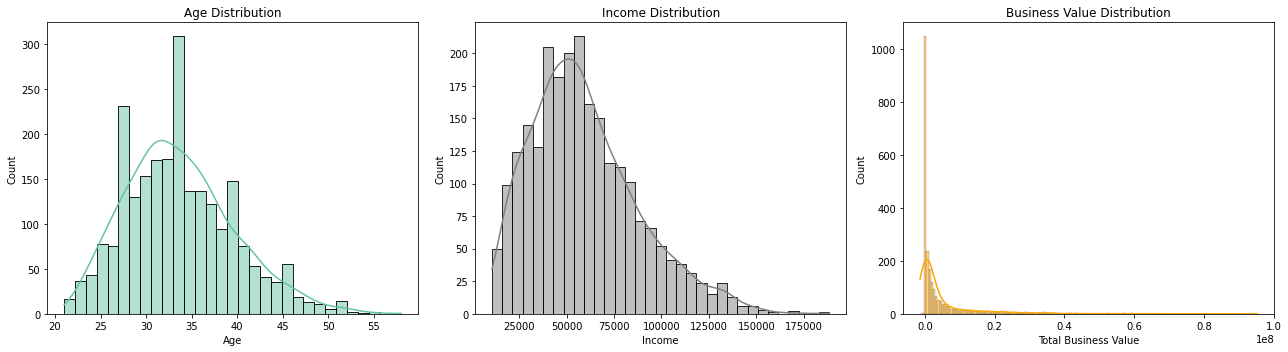

In [214]:
# Set up the subplots
fig, ax1 = plt.subplots(1, 3, figsize=(18, 5))
# Plot Age distribution with KDE
sns.histplot(df1['Age'], kde=True, ax=ax1[0])
ax1[0].set_title('Age Distribution')
# Plot Income distribution with KDE
sns.histplot(df1['Income'], kde=True, ax=ax1[1], color='grey')
ax1[1].set_title('Income Distribution')

sns.histplot(df1['Total Business Value'], kde=True, ax=ax1[2], color='orange')
ax1[2].set_title('Business Value Distribution')
fig.tight_layout()
plt.show()


- Age Distribution: The age distribution appears to be normally distributed, or bell-shaped. This suggests that most people fall around the average age, with fewer people being very young or very old.
- Income Distribution: The income distribution appears to be right-skewed. This means that there are more people with lower incomes than there are people with higher incomes. This is a common distribution for income data.
- Business Value Distribution: The business value distribution is also right-skewed, similar to the income distribution. This suggests that there are more businesses with lower values than there are businesses with higher values.

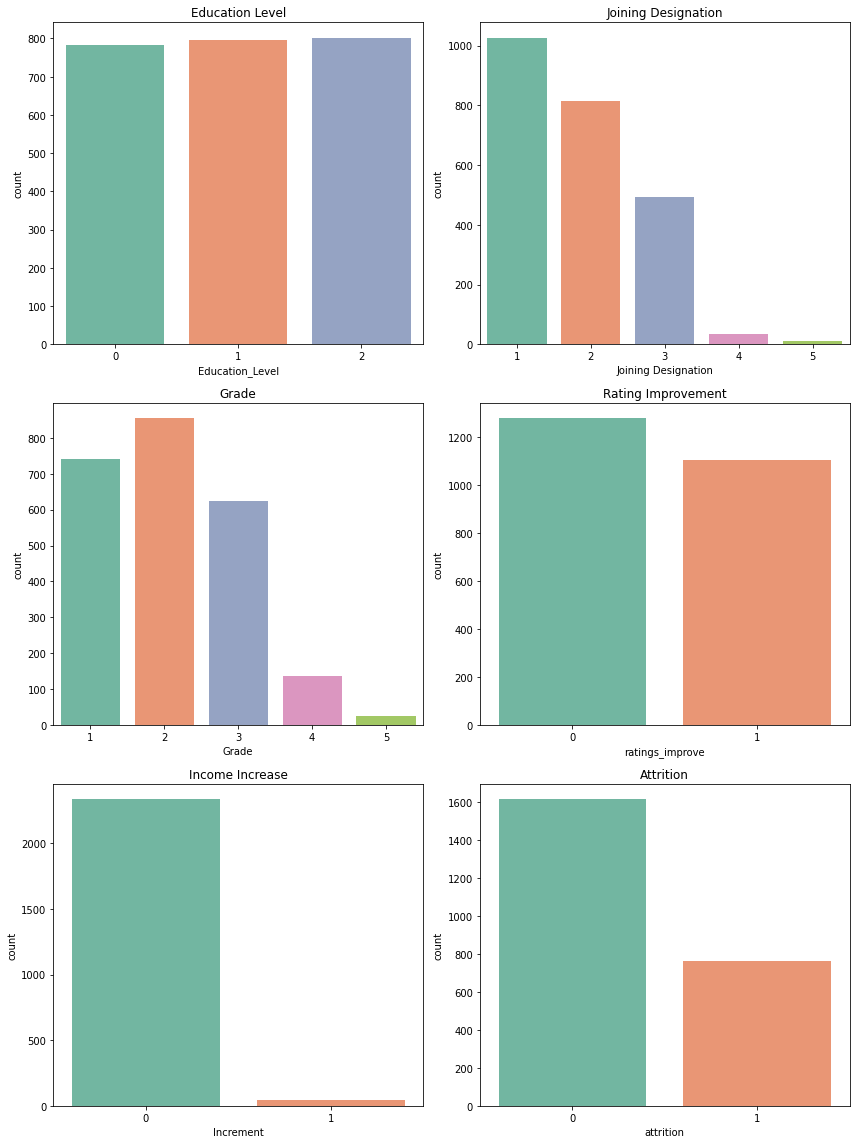

In [215]:
sns.set_palette("Set2")
fig, axs = plt.subplots(3, 2, figsize=(12, 16))

# Plot countplot for Education Level
sns.countplot(data=df1, x='Education_Level', ax=axs[0, 0])
axs[0, 0].set_title('Education Level')

# Plot countplot for Joining Designation
sns.countplot(data=df1, x='Joining Designation', ax=axs[0, 1])
axs[0, 1].set_title('Joining Designation')

# Plot countplot for Grade
sns.countplot(data=df1, x='Grade', ax=axs[1, 0])
axs[1, 0].set_title('Grade')

# Plot countplot for Quarterly Rating
sns.countplot(data=df1, x='ratings_improve', ax=axs[1, 1])
axs[1, 1].set_title('Rating Improvement')

sns.countplot(data=df1, x='Increment', ax=axs[2, 0])
axs[2, 0].set_title('Income Increase')

sns.countplot(data=df1, x='attrition', ax=axs[2, 1])
axs[2, 1].set_title('Attrition')


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


<Axes: >

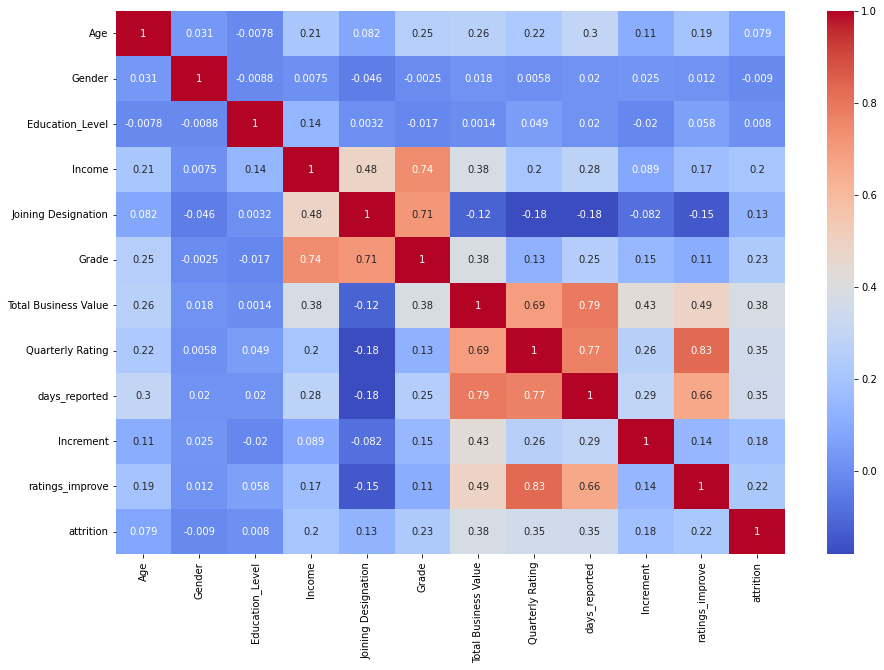

In [216]:
# Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)

Correlations:

- Age: Age has a weak positive correlation with most performance metrics, with the strongest correlations being with total business value (0.26) and quarterly rating (0.22). This could be due to several factors, such as experience or seniority.
Gender: Gender has a very weak correlation with most performance metrics. There is a negative correlation with age (-0.009), which means that females tend to be younger than males in the dataset.
- Education Level: Education level has a weak positive correlation with most performance metrics. The strongest correlations are with income (0.14) and total business value (0.049). This suggests that employees with higher education levels may tend to have higher incomes and create more value for the company.
- Income: Income has a moderate positive correlation with most performance metrics. The strongest correlations are with grade (0.74) and joining designation (0.48). This suggests that employees with higher incomes tend to have higher grades and more senior positions.
- Joining Designation: Joining designation has a moderate positive correlation with most performance metrics. The strongest correlations are with income (0.48) and grade (0.71). This suggests that employees with more senior positions tend to have higher incomes and grades.
- Grade: Grade has a moderate positive correlation with most performance metrics. The strongest correlations are with income (0.74) and total business value (0.38). This suggests that employees with higher grades tend to have higher incomes and create more value for the company.
- Total Business Value: Total business value has a weak to moderate positive correlation with most performance metrics. The strongest correlations are with grade (0.38) and quarterly rating (0.69). This suggests that employees who create more value for the company tend to have higher grades and quarterly ratings.
- Quarterly Rating: Quarterly rating has a weak to moderate positive correlation with most performance metrics. The strongest correlations are with total business value (0.69) and days reported (0.77). This suggests that employees with higher quarterly ratings tend to create more value for the company and work more days.
- Days Reported: Days reported has a weak to moderate positive correlation with most performance metrics. The strongest correlations are with quarterly rating (0.77) and ratings improvement (0.66). This suggests that employees who work more days tend to have higher quarterly ratings and improve their ratings over time.
- Increment: Increment has a weak positive correlation with most performance metrics. The strongest correlation is with ratings improvement (0.14). This suggests that there is a weak relationship between the size of an employee's raise and their improvement in ratings.
- Ratings Improvement: Ratings improvement has a weak positive correlation with most performance metrics. The strongest correlation is with days reported (0.66). This suggests that employees who improve their ratings tend to work more days.


Total Business Column

In [217]:
df1 = df1[df1['Total Business Value'] > 1]

## Building The Model

One hot encoding

In [240]:
cat_columns = ['Grade', 'Education_Level', 'Joining Designation']
df1[cat_columns] = df1[cat_columns].astype('category')

df1 = pd.get_dummies(df1, columns=cat_columns)


In [241]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [242]:
X = df1.drop('attrition', axis=1)
y = df1['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

In [243]:
bagging_clf.fit(X_train,y_train)
# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Precision: 0.722
Recall: 0.460
F1 score: 0.562


In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.81       207
           1       0.72      0.46      0.56       124

    accuracy                           0.73       331
   macro avg       0.73      0.68      0.68       331
weighted avg       0.73      0.73      0.71       331



## Imbalance Treatment 

In [245]:
from imblearn.over_sampling import SMOTE

# Assuming df1 is your DataFrame and 'attrition' is the target column
X = df1.drop('attrition', axis=1)
y = df1['attrition']

# Initialize SMOTE with a random state
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df2 = pd.DataFrame(X_resampled, columns=X.columns)
df2['attrition'] = pd.Series(y_resampled, index=df2.index)


In [246]:
df2

,Age,Gender,Income,Total Business Value,Quarterly Rating,days_reported,Increment,ratings_improve,Grade_1,Grade_2,...,Grade_5,Education_Level_0,Education_Level_1,Education_Level_2,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5,attrition
0,28.000000,0.000000,57387,1715580,2,3,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,43.000000,0.000000,65603,350000,1,5,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,29.000000,0.000000,46368,120360,1,3,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,31.000000,1.000000,78728,1265000,2,5,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,35.000000,0.000000,28116,2607180,4,6,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,37.232344,0.876766,127668,13164352,4,14,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2104,31.736654,0.342082,64525,25936663,3,24,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2105,29.608684,1.000000,19460,935849,2,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2106,32.000000,1.000000,35530,14894361,4,24,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [247]:
df2['attrition'].value_counts()

0    1054
1    1054
Name: attrition, dtype: int64

#### Scaling is not a necessary step for DTs so we can skip this part

In [248]:
X = df2.drop('attrition', axis=1)
y = df2['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

In [249]:
bagging_clf.fit(X_train,y_train)
# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Precision: 0.820
Recall: 0.781
F1 score: 0.800


In [250]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       212
           1       0.82      0.78      0.80       210

    accuracy                           0.81       422
   macro avg       0.81      0.81      0.81       422
weighted avg       0.81      0.81      0.81       422



In [252]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = bagging_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)



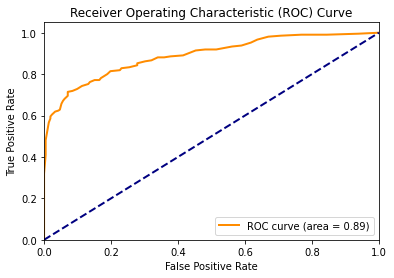

In [253]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Boosting Classifier

In [254]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)



In [255]:
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("F1 score:", f1)
print("Classification Report:\n", report)


F1 score: 0.8117359413202934
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       212
           1       0.83      0.79      0.81       210

    accuracy                           0.82       422
   macro avg       0.82      0.82      0.82       422
weighted avg       0.82      0.82      0.82       422



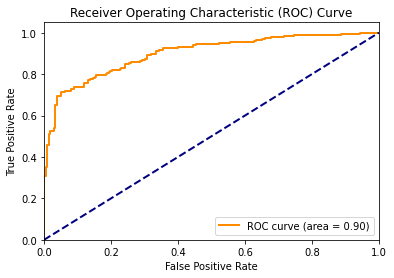

In [256]:
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Comments on the ROC plot:

The area under the ROC curve (AUC) is 0.90, which is a good value. An AUC of 1 represents a perfect classifier, while an AUC of 0.5 is no better than random guessing. So, this model can effectively distinguish between positive and negative cases.
The curve bows upwards towards the top-left corner of the plot, which is a desirable feature. This indicates that the model is good at identifying true positives while keeping false positives low.
Overall, the ROC plot suggests that this is a well-performing classification model.

## Hyperparameter Tuning

#### For Bagging Ensemble

In [257]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [10, 100],
    'max_samples': [0.1, 1.0],
    'max_features': [0.1, 1.0],
}

# Initialize the BaggingClassifier with the default hyperparameters
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Initialize the RandomizedSearchCV object
rs_clf = RandomizedSearchCV(estimator=bagging_clf, param_distributions=param_dist, n_iter=8, scoring='f1', cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the training data
rs_clf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", rs_clf.best_params_)




Best hyperparameters: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0}


In [258]:
# Fit the BaggingClassifier with the best hyperparameters to the training data
bagging_clf_best = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=rs_clf.best_params_['n_estimators'], max_samples=rs_clf.best_params_['max_samples'], max_features=rs_clf.best_params_['max_features'], random_state=42)
bagging_clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = bagging_clf_best.predict(X_test)

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       212
           1       0.82      0.78      0.80       210

    accuracy                           0.80       422
   macro avg       0.80      0.80      0.80       422
weighted avg       0.80      0.80      0.80       422



The values in the table show that the model is performing well on both classes. 

The overall accuracy of the model is 0.80, which means that it correctly classified 80% of the data points.

In [259]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.1, 0.5, 1.0],
    'max_features': [0.1, 0.5, 1.0]
}

# Initialize the BaggingClassifier with the default hyperparameters
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, scoring='f1', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50}


In [260]:
# Fit the BaggingClassifier with the best hyperparameters to the training data
bagging_clf_best = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=grid_search.best_params_['n_estimators'], max_samples=grid_search.best_params_['max_samples'], max_features=grid_search.best_params_['max_features'], random_state=42)
bagging_clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = bagging_clf_best.predict(X_test)

# Calculate the precision, recall, and F1 score
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 score:", f1_best)

print(classification_report(y_test, y_pred_best))

Precision: 0.812206572769953
Recall: 0.8238095238095238
F1 score: 0.8179669030732859
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       212
           1       0.81      0.82      0.82       210

    accuracy                           0.82       422
   macro avg       0.82      0.82      0.82       422
weighted avg       0.82      0.82      0.82       422



#### For Boosting Ensemble

Random Search CV

In [261]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the hyperparameter search space for random search
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(2, 12),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 0.6),
    'reg_lambda': uniform(0, 0.8)
}

# Initialize the XGBoost classifier with the default hyperparameters
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=4, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)


Best hyperparameters: {'colsample_bytree': 0.6786759500459125, 'max_depth': 2, 'n_estimators': 139, 'reg_alpha': 0.5714878200067721, 'reg_lambda': 0.7272094713680066}


In [262]:

# Fit the XGBoost classifier with the best hyperparameters to the training data
xgb_clf_best = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **random_search.best_params_)
xgb_clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_clf_best.predict(X_test)

# Calculate the precision, recall, and F1 score
precision_best = precision_score(y_test, y_pred)
recall_best = recall_score(y_test, y_pred)
f1_best = f1_score(y_test, y_pred_best)

print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 score:", f1_best)

print(classification_report(y_test, y_pred))

Precision: 0.8634146341463415
Recall: 0.8428571428571429
F1 score: 0.8179669030732859
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       212
           1       0.86      0.84      0.85       210

    accuracy                           0.86       422
   macro avg       0.86      0.86      0.86       422
weighted avg       0.86      0.86      0.86       422



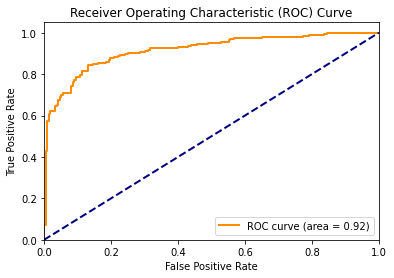

In [263]:
y_pred_prob = xgb_clf_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Comments on the ROC plot:

The area under the ROC curve (AUC) is 0.92, which is asignificant improvement over 0.88 and a good value. An AUC of 1 represents a perfect classifier, while an AUC of 0.5 is no better than random guessing. So, this model can effectively distinguish between positive and negative cases.
The curve bows upwards towards the top-left corner of the plot, which is a desirable feature. This indicates that the model is good at identifying true positives while keeping false positives low.
Overall, the ROC plot suggests that this is a well-performing classification model.

### Recommendations and Insights



1. **Driver Reporting**: Encourage drivers to report maximum number of days worked, as this can help the business by ensuring that drivers are available for longer periods of time.
2. **Ratings and Retention**: Implement a system to regularly review driver performance and provide performance-based incentives to improve driver retention.
3. **Grade and Joining Designations**: Consider the correlation between grade and joining designations when making decisions about driver compensation and promotions.
4. **Performance-Based Incentives**: Implement regular performance-based incentives to motivate drivers to maintain good performance and reduce turnover.
5. **Cross-Functional Collaboration**: Encourage cross-functional collaboration between different departments to ensure that driver needs are being met and that they are being rewarded for good performance.
6. **Continuous Improvement**: Regularly review and update driver compensation and benefits to ensure that they are competitive and aligned with industry standards.
7. **Compliance**: Ensure compliance with Department of Transportation (DOT) regulations related to hours of service and log book rules for truck drivers in the USA.
8. **Training and Development**: Provide ongoing training and development opportunities to help drivers improve their skills and advance their careers.
9. **Employee Engagement**: Foster a positive work culture that values employee engagement and input to help improve driver satisfaction and retention.
10. **Data-Driven Decisions**: Use data to inform decisions about driver compensation, benefits, and performance management to ensure that they are aligned with business goals and objectives.

